In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture

In [2]:
from get_data import gmm_playlists_to_csv
gmm_playlists_to_csv('bornofawesomeness')

### edit above lines if moodify is running and you wish to
### use someone else's data

'data.csv updated for the user bornofawesomeness'

## Goals:
- Explore how the metadata is reflected with the playlists
- Further user statistics with features like popularity

In [3]:
df = pd.read_csv('data.csv')
df

,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
0,5Hfi7ZlAERXAvqmXUrVYa2,Wanna Lose You,46,0,0.550,0.794,0.101000,0.463,159.923
1,1i1fxkWeaMmKEB4T7zqbzK,Don't Let Me Down,87,0,0.532,0.869,0.157000,0.419,159.803
2,5jPMcL5mNq82zfRVplSpxG,Brainless,24,0,0.710,0.938,0.166000,0.573,172.032
3,3UgSQu6WwrXfKKDq019IHE,To Ü (feat. AlunaGeorge),66,0,0.485,0.928,0.134000,0.362,160.165
4,5BRrBkpj0An7PViNqMCoGa,Dum Dee Dum,57,0,0.755,0.891,0.273000,0.517,160.021
5,5zz33Ev3mwKnpXI9IZ3a8K,Run This Town,0,0,0.509,0.920,0.279000,0.441,173.564
6,3xIwnKhZxWxKcecqrfXBJj,The Drop,50,0,0.689,0.879,0.104000,0.544,170.036
7,3G1Na74xxuAhiWLyXDPCFN,I Need A Doctor - Edited Version,33,0,0.586,0.930,0.108000,0.483,156.024
8,0gAvViUcru8Qsl40BS4SvH,Battle Scars,30,0,0.517,0.811,0.186000,0.497,168.269
9,6ZuS5RntipgpizPwjdQ86V,Coming Home,28,0,0.351,0.832,0.170000,0.225,168.730


In [6]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
track_id        736 non-null object
track_name      736 non-null object
popularity      736 non-null int64
playlist_id     736 non-null int64
danceability    736 non-null float64
energy          736 non-null float64
acousticness    736 non-null float64
valence         736 non-null float64
tempo           736 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 51.8+ KB


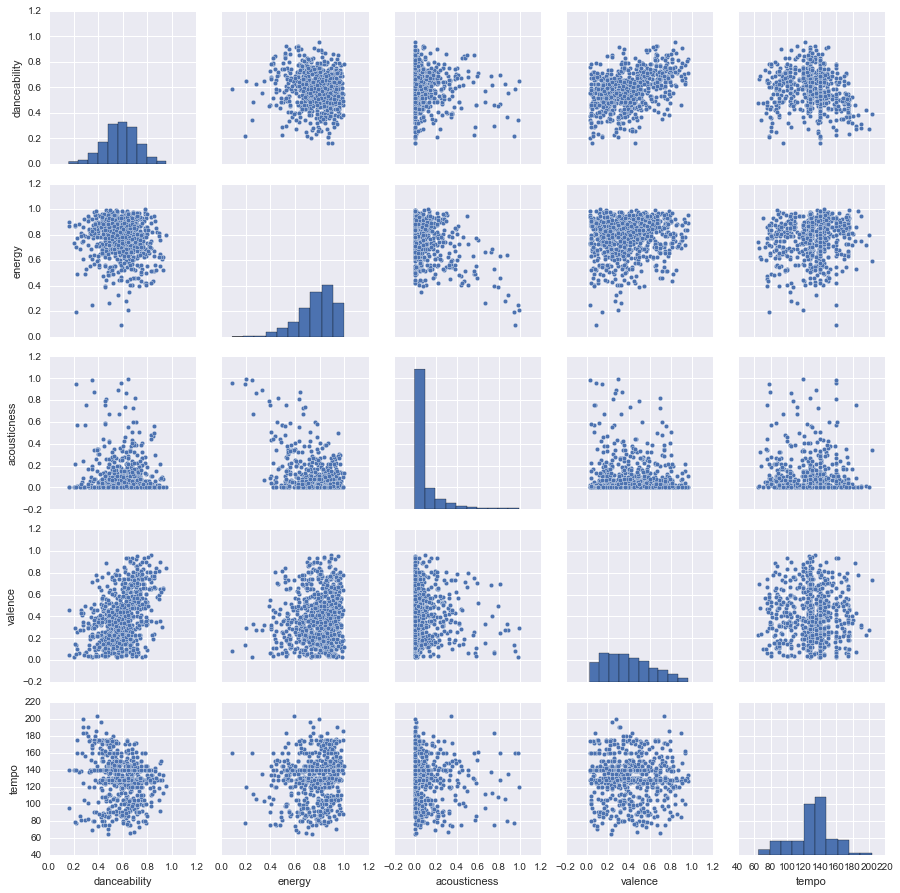

In [7]:
sns.pairplot(df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

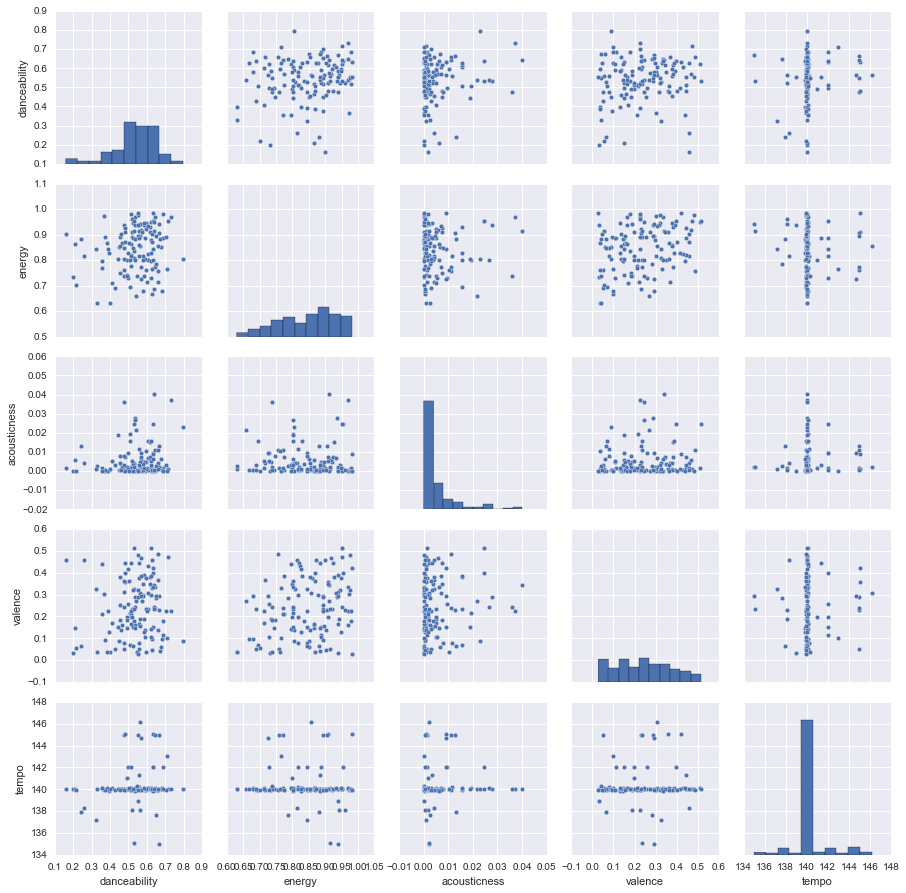

In [8]:
temp_df = df[df['playlist_id'] == 21]
sns.pairplot(temp_df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

In [9]:
temp_df

,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
384,09ksjcoNRqa20lCyzNsKjB,Levels,18,21,0.661,0.716,0.004230,0.3680,139.948
385,4khAZaVsqoaSZfnJNRv2Wi,Mad - Promo Version,17,21,0.200,0.732,0.000015,0.0328,139.980
386,363t9y4aYAZiDZiCfi5mql,Sierra Leone - Araabmuzik Remix,36,21,0.259,0.815,0.004090,0.4580,138.281
387,6tuLr8B7NkM9qlhB9SG1Iz,Born - Original Mix,48,21,0.493,0.799,0.001710,0.1960,141.012
388,2L7plRhGDguuuM9J1u5R7x,Need Your Heart (feat. Kai),48,21,0.410,0.712,0.005120,0.1700,140.093
389,56lxsZRixIIQppROhHiVJF,Heartbeat (DMNDZ Remix) [feat. Collin McLoughlin],0,21,0.604,0.801,0.015500,0.2360,139.996
390,1SCpAAw3towOivp0UoNiV1,In My Eyes - Original Mix,36,21,0.509,0.802,0.019400,0.2180,140.108
391,3nPpCn5nYTMg0ajmzv57Jq,Lights - Bassnectar Remix,55,21,0.529,0.809,0.004220,0.3250,140.006
392,1ShWHEgisDGPl9G3g85ANu,Breakn' A Sweat,57,21,0.596,0.921,0.004900,0.2320,139.969
393,4rwpZEcnalkuhPyGkEdhu0,Scary Monsters And Nice Sprites,60,21,0.523,0.944,0.003360,0.3200,139.997


In [10]:
data = df['tempo'].values
mean= data.mean()
result = df[(data > mean - 1) & (data < mean + 1)]
print(result.shape)
result

(30, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
15,0hAR6VcN5P1klbHiZmDMJc,It's Time - Original Mix,0,0,0.744,0.806,0.007740,0.468,130.037
20,40Fp6pxcS9l08kL1R50mR4,First Time,45,0,0.441,0.949,0.000044,0.447,130.817
21,5ujmAC6yp9J29zNnq6BE5i,Alchemy,39,0,0.578,0.690,0.030400,0.252,129.919
24,0IkKz2J93C94Ei4BvDop7P,Party Rock Anthem,61,0,0.739,0.725,0.023500,0.345,130.024
27,5brviRvO3ZIDvdF0dED9wC,Bad Wings,50,0,0.631,0.684,0.013800,0.230,129.961
35,1dFkD1JfRMzwO6hwUsE8aS,Spectrum,58,0,0.616,0.795,0.020400,0.490,129.930
43,1XAQlg3R6XWvCgPYsxAWmy,The Home We Made Pt. II (Bonus Version),33,0,0.613,0.770,0.006390,0.320,129.967
45,2U0pVx4m1Kdm1Gsjjm6iq8,Strangers,58,0,0.577,0.691,0.013400,0.489,129.984
53,6lbhkPbkKj6jnPTt1FelVo,Bullet Train (feat. Joni Fatora),62,0,0.546,0.703,0.007970,0.205,129.868
92,34SeXRsXqAQPMCW9X1Gdzs,Keep Moving - Original Mix,21,3,0.585,0.890,0.007170,0.427,130.006


In [11]:
data = df['energy'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .1
result = df[(data > max_energy - range_) & (data <= max_energy)]
print(result.shape)
result

(132, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
20,40Fp6pxcS9l08kL1R50mR4,First Time,45,0,0.441,0.949,0.000044,0.4470,130.817
54,5i7fZq3chLyCHo3VeB6goD,First Of The Year (Equinox),67,0,0.429,0.948,0.007110,0.5610,115.785
57,5e0dZqrrTaoj6AIL7VjnBM,Written in the Stars (feat. Eric Turner),45,1,0.656,0.941,0.069400,0.5180,91.914
69,3jKK4kpTJEnTX5oQt0Hokj,Cantina Boys,34,1,0.637,0.963,0.139000,0.4020,105.055
77,35Zv0HFPaXFfkZg32R84OH,Sweet Nothing - Diplo + Grandtheft Remix,46,2,0.401,0.956,0.308000,0.2500,140.058
89,0kpMAq4SeMfl93tMqlCInk,Still Getting It,18,3,0.591,0.956,0.005560,0.6560,140.062
90,1ghUWRA4BLzCVBpzJhbN0m,Karate - Original Mix,57,3,0.626,0.961,0.000407,0.6240,128.009
95,4CbKVDZkYKdv69I4bCaKUq,Hero,69,3,0.533,0.967,0.007910,0.7860,142.018
96,40jr6hmQNFJFGjllxEFMPX,Lines in Wax (feat. Foreign Beggars),37,3,0.657,0.958,0.001870,0.6950,139.993
99,5wd14CMjlqbSjibnpoTgla,Enigma (feat. GRRL PAL),55,3,0.631,0.909,0.006830,0.6360,153.931


In [12]:
data = df['danceability'].values
max_dance = data.max()
min_dance = data.min()
range_ = (max_dance - min_dance) * .1
result = df[(data > max_dance - range_) & (data <= max_dance)]
print(result.shape)
result

(12, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
2,0CAfXk7DXMnon4gLudAp7J,Low (feat T-Pain),73,0,0.918,0.609,0.092800,0.304,128.008
49,2lXzgU19U9cSZLJtawjob6,Moar Ghosts 'n' Stuff,43,0,0.903,0.648,0.000105,0.355,128.014
212,18UhvUi9FjHtoTgnqX7kbl,Drop It Like It's Hot - Album Version (Edited),30,10,0.903,0.550,0.217000,0.647,92.009
349,1pKYYY0dkg23sQQXi0Q5zN,Around The World,66,19,0.956,0.795,0.003560,0.840,121.294
353,6zlOUIqcU6juXFww9UNpJK,Five Hours,14,19,0.880,0.821,0.019700,0.576,127.907
356,7sm1xuahSGG5qFa9pFXWVs,Just Dance - RedOne Remix,39,19,0.893,0.812,0.003400,0.815,119.021
357,7n8eZAUj6vevNQZ0EF3OH0,Without Me,28,19,0.926,0.626,0.003010,0.663,112.246
360,5rb9QrpfcKFHM1EUbSIurX,Yeah!,76,19,0.894,0.791,0.018300,0.594,105.018
666,2Vyny7HMXDxIw4NqqkViAn,Cleanin' Out My Closet,26,34,0.907,0.756,0.081600,0.901,148.017
683,2EDLxm55ESkYQ1h0Isfwdv,Fake Love,51,34,0.924,0.526,0.081600,0.655,133.972


In [13]:
data = df['valence'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .9
result = df[(data > 0) & (data <= max_energy - range_)]
print(result.shape)
result

(77, 9)


,track_id,track_name,popularity,playlist_id,danceability,energy,acousticness,valence,tempo
1,3bNopejTiuFxDpB7CZhaRX,Almost Famous,34,0,0.699,0.5210,0.033900,0.0906,124.051
30,2KNsflubHgQQJJ1KEGvFNv,Avaritia,40,0,0.756,0.7270,0.022900,0.0316,128.025
34,0DIekYoiwwr1kkTUGmQlSL,Strobe - Radio Edit,54,0,0.656,0.6620,0.000081,0.0748,128.022
59,1MwnqTZQR89Y0LOLMJUceN,Gold Love - feat. Rosie Oddie,31,1,0.468,0.9070,0.001690,0.0379,108.738
74,1uIjVysHAMBXEr8Arx7tfT,Ave,47,2,0.587,0.0877,0.952000,0.0842,159.801
76,44nFlz3tVXesHRGuDvZfdD,02:09,53,2,0.347,0.2460,0.984000,0.0304,159.969
127,3cKuHj37BQXHQVjPplPqnd,Take U Out,45,4,0.507,0.7950,0.012300,0.0662,159.989
128,2gGIKneJlUPPJEOjhufEb1,Interplanetary - Original Mix,39,4,0.557,0.9710,0.057500,0.1160,163.055
133,33uuhMsavEjGWZ8of1dNIJ,Lose Yourself - Soundtrack Version,52,4,0.703,0.7280,0.005090,0.0661,171.424
136,6XptOuDraarGwkisvMpZj5,Take Ü There (feat. Kiesza),48,4,0.542,0.8790,0.052300,0.1180,159.888
